<a href="https://colab.research.google.com/github/rykah14/-TextClustering/blob/main/test_for_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 3.3 MB 52.8 MB/s 
     |████████████████████████████████| 895 kB 60.7 MB/s 
     |████████████████████████████████| 596 kB 79.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/reddit.csv")

# Report the number of sentences.
print('Number of sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of sentences: 1,000,000



,subreddit,body,controversiality,score
470773,todayilearned,That scene was cut out of the UK release becau...,0,11
160561,movies,I don't see how it was a joke but ok.,0,0
516772,marvelstudios,The in universe explanation for this was that ...,0,1
537996,nfl,Oh good I'm sick again.\n\n\nFuck 3rd and 4th ...,0,2
723974,leagueoflegends,I got dia on my smurf with 75%winrate and i go...,0,0
661143,teenagers,No it’s not from twitch rofl,0,2
42374,nba,"Well, you can't celebrate in a FT line. Doesn'...",0,1
74449,nba,It surprised me as well even before I saw your...,0,7
80947,AskReddit,Honestly I love my hospice patients so much. W...,0,12
382400,pics,I'm just suggesting you keep your bullshit to ...,1,4


In [ ]:
print("subreddit多いもの順50")
count_df = df[['subreddit','body']].groupby('subreddit').aggregate({'body':'count'}).reset_index().sort_values('subreddit',ascending=True)
print(count_df.head(50))

subreddit多いもの順50
              subreddit   body
0         AmItheAsshole  25000
1              Animemes  25000
2             AskReddit  25000
3        ChapoTrapHouse  25000
4            FortNiteBR  25000
5              Market76  25000
6          MortalKombat  25000
7                Pikabu  25000
8               RoastMe  25000
9        Showerthoughts  25000
10        SquaredCircle  25000
11           The_Donald  25000
12          apexlegends  25000
13               asoiaf  25000
14                  aww  25000
15            dankmemes  25000
16             freefolk  25000
17                funny  25000
18        gameofthrones  25000
19               gaming  25000
20             gonewild  25000
21               hockey  25000
22      leagueoflegends  25000
23        marvelstudios  25000
24                memes  25000
25               movies  25000
26                  nba  25000
27                 news  25000
28                  nfl  25000
29                 pics  25000
30             politic

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込

# データの抽出
df_0 = df.loc[df['subreddit'].isin(['news']), ['subreddit', 'body']]
df_0=df_0.replace('news',0)
split_dataset_0,discard_0=train_test_split(df_0, train_size=(5000/25000)) 
print("使えるデータセット")
print(split_dataset_0)

df_1 = df.loc[df['subreddit'].isin(['worldnews']), ['subreddit', 'body']]
df_1=df_1.replace('worldnews',1)
split_dataset_1 ,discard_1= train_test_split(df_1, train_size=(5000/25000))
print("使えるデータセット")
print(split_dataset_1)



list=[]
list.append(split_dataset_0)
list.append(split_dataset_1)



df = pd.concat(list, sort=False)
print(df)

使えるデータセット
        subreddit                                               body
769380          0  Right, she got expelled, but the people that l...
672824          0  Hey if it brings attention to their ecological...
29380           0  Need more guns and walls to keep out foreigner...
158488          0  I’m a student of UNCC and luckily wasn’t on ca...
393740          0  Did you read the article...It means a women’s ...
...           ...                                                ...
655485          0               You could just... not eat meat 🤷🏻‍♀️
638236          0   Why don't they do this to wasps?! We need bees 💔
541130          0  Sorry, I didn't mean to suggest everyone who o...
189916          0  This is stupid advice. If there are rumors of ...
201154          0  You're right, that's from dying in a mass shoo...

[5000 rows x 2 columns]
使えるデータセット
        subreddit                                               body
34769           1                    Didn't Maduro win the

In [ ]:
print(df.sample(10))

        subreddit                                               body
255049          1  Living on different continents and seeing each...
395878          1  That's the central question involving our envi...
601718          1  The precedent is for the Presidential candidat...
767519          0   Read this as "fish-shaking", made it even better
175742          0  "If you can't deal with bullshit that only eve...
771393          0  &gt; Her family got scammed. \n\nAnd they prob...
642814          1  You son of a bitch. Do you know how much disap...
20350           0  That’s fucking terrifying. What would make som...
512578          1  &gt; At least under Trump we don't have to dea...
456788          1  That's great. Now provide evidence that this i...


In [ ]:
df.loc[df.subreddit == 0].sample(5)[['subreddit','body']]

,subreddit,body
135740,0,I believe it's march for our lives? Pretty sur...
444840,0,I don't think we disagree. My overall point is...
36565,0,Giving out red pills for breakfast
188005,0,Citation needed on the swimming pool deaths. I...
129637,0,Judging by your post history I think you might...


In [ ]:
# Get the lists of sentences and their labels.
subreddits = df.subreddit.values
bodys = df.body.values

In [ ]:
print(bodys[1:10])

['Hey if it brings attention to their ecological importance and the dire consequences off a mass die-off then I’m ok with it.\n\nWon’t watch it, but I’m ok with it.\n\nPlus “Bee Wars” just sounds badass.'
 'Need more guns and walls to keep out foreigners, obviously. /s'
 'I’m a student of UNCC and luckily wasn’t on campus. I have tons of friends who were though. They are just NOW allowing students to leave. This was the last day of class. I had just presented my senior design project. I had a friend who was barricaded in a room in the building adjacent to the one it occurred in. I have class in that building every week.  I’m at a loss for words.'
 'Did you read the article...It means a women’s with an abnormally high level of testosterone will have more muscle mass, be physically stronger, and have better endurance. The ruling seeks to ensure all female participants are competing equally without the biological inherent advantage of elevated testosterone'
 'Is Sea horse with no name nex

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
# Print the original sentence.
print(' Original: ', bodys[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(bodys[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(bodys[1])))

 Original:  Hey if it brings attention to their ecological importance and the dire consequences off a mass die-off then I’m ok with it.

Won’t watch it, but I’m ok with it.

Plus “Bee Wars” just sounds badass.
Tokenized:  ['hey', 'if', 'it', 'brings', 'attention', 'to', 'their', 'ecological', 'importance', 'and', 'the', 'dire', 'consequences', 'off', 'a', 'mass', 'die', '-', 'off', 'then', 'i', '’', 'm', 'ok', 'with', 'it', '.', 'won', '’', 't', 'watch', 'it', ',', 'but', 'i', '’', 'm', 'ok', 'with', 'it', '.', 'plus', '“', 'bee', 'wars', '”', 'just', 'sounds', 'bad', '##ass', '.']
Token IDs:  [4931, 2065, 2009, 7545, 3086, 2000, 2037, 12231, 5197, 1998, 1996, 18704, 8465, 2125, 1037, 3742, 3280, 1011, 2125, 2059, 1045, 1521, 1049, 7929, 2007, 2009, 1012, 2180, 1521, 1056, 3422, 2009, 1010, 2021, 1045, 1521, 1049, 7929, 2007, 2009, 1012, 4606, 1523, 10506, 5233, 1524, 2074, 4165, 2919, 12054, 1012]


ここでひっかかる

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in bodys:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        str(sent),                     # Sentence to encode. #ここを書き換えれば解決
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', bodys[10])
print('Token IDs:', input_ids[10])

Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors


Original:  That crowd specifically is probably closer to 0.001% of the population.
Token IDs: [101, 2008, 4306, 4919, 2003, 2763, 3553, 2000, 1014, 1012, 25604, 1003, 1997, 1996, 2313, 1012, 102]


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_subreddits, validation_subreddits = train_test_split(input_ids, subreddits, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, subreddits,
                                             random_state=2018, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_subreddits = torch.tensor(train_subreddits)
validation_subreddits = torch.tensor(validation_subreddits)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_subreddits)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_subreddits)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
print("length of train data:",len(train_data))
print("length of validation data:",len(validation_data))

length of train data: 9000
length of validation data: 1000


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
whos

Variable                        Type                             Data/Info
--------------------------------------------------------------------------
AdamW                           type                             <class 'transformers.optimization.AdamW'>
BertConfig                      type                             <class 'transformers.mode<...>uration_bert.BertConfig'>
BertForSequenceClassification   type                             <class 'transformers.mode<...>rSequenceClassification'>
BertTokenizer                   type                             <class 'transformers.mode<...>tion_bert.BertTokenizer'>
DataLoader                      type                             <class 'torch.utils.data.dataloader.DataLoader'>
MAX_LEN                         int                              64
RandomSampler                   type                             <class 'torch.utils.data.sampler.RandomSampler'>
SequentialSampler               type                             <class 'torch.utils

In [ ]:
del list

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.4f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        #print("tmp_eval_accuracy\n",tmp_eval_accuracy)
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        #print("eval_accuracy\n",eval_accuracy)
        # Track the number of batches
        nb_eval_steps += 1

        #print("logits\n",logits)
        #print("label_ids\n",label_ids)
        #print("nb_eval_steps\n",nb_eval_steps)

    # Report the final accuracy for this validation run.


    print("  Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch   100  of    282.    Elapsed: 0:00:21.
  Batch   200  of    282.    Elapsed: 0:00:41.

  Average training loss: 0.1919
  Training epcoh took: 0:00:58

Running Validation...
  Accuracy: 0.7354
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...
  Batch   100  of    282.    Elapsed: 0:00:21.
  Batch   200  of    282.    Elapsed: 0:00:41.

  Average training loss: 0.1677
  Training epcoh took: 0:00:58

Running Validation...
  Accuracy: 0.7354
  Validation took: 0:00:02

======== Epoch 3 / 4 ========
Training...
  Batch   100  of    282.    Elapsed: 0:00:20.
  Batch   200  of    282.    Elapsed: 0:00:41.

  Average training loss: 0.1662
  Training epcoh took: 0:00:58

Running Validation...
  Accuracy: 0.7354
  Validation took: 0:00:02

======== Epoch 4 / 4 ========
Training...
  Batch   100  of    282.    Elapsed: 0:00:20.
  Batch   200  of    282.    Elapsed: 0:00:41.

  Average training loss: 0.2001
  Training epcoh too

In [ ]:
eval_accuracy

23.53125

In [ ]:
nb_eval_steps

32

In [ ]:
eval_accuracy/nb_eval_steps

0.7353515625

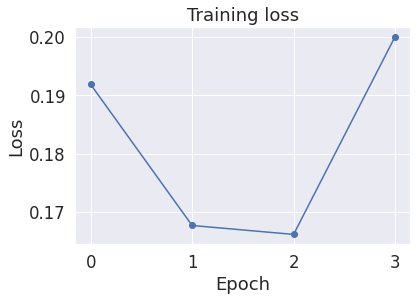

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
#plt.rcParam["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
loss_values

[0.19188531986206558,
 0.167697733122829,
 0.16616648555805918,
 0.20006720852503118]

In [ ]:
import plotly.express as px

f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

test でやってみるのまき


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



split_dataset_test_0,discard_test_0=train_test_split(discard_0, train_size=(1000/(25000-5000))) 
print("使えるデータセット")
print(split_dataset_test_0)

split_dataset_test_1 ,discard_test_1= train_test_split(discard_1, train_size=(1000/(25000-5000)))
print("使えるデータセット")
print(split_dataset_test_1)



list=[]
list.append(split_dataset_test_0)
list.append(split_dataset_test_1)



df = pd.concat(list, sort=False)
print(df)

使えるデータセット
        subreddit                                               body
537529          0  If guns made us less safe, given the number of...
765741          0  If you happen to be eating a milkshake you cou...
52548           0  [FBI Active shooter study from 2000-2013](http...
281312          0  Can we take a moment to thank the officers who...
185541          0  I am not sure if we are talking about differen...
...           ...                                                ...
186452          0  Yeah, for attention. Sadly, the majority of ma...
424736          0  I bought my first house (built in 1899, 2 stor...
763787          0  What I want to know is amongst all the backlas...
563759          0        The wasps have made the first offensive....
727172          0  Let’s be wallowing in our own shit when Jesus ...

[1000 rows x 2 columns]
使えるデータセット
        subreddit                                               body
232348          1  'WMDs worked with Iraq, why not Venezue

In [ ]:
print(df.sample(10))

        subreddit                                               body
643871          1  Breaking News: 400 page Mueller report release...
668448          0                        Me too. That's why I carry.
114181          0  If you can dodge my fist you're ready for the ...
7244            1  Venezuelans knows that everything that is goin...
544239          0  My dad's a mechanic and I just ask him. Honda'...
211600          1  They're probably not once they find out. It's ...
216093          1  You know education is free right now right?\n\...
521583          1  British refer to 'Asia' as the Middle East and...
304296          1                        Good \nThey are shit anyway
548879          0  Not really lying to themselves, its way better...


In [ ]:
# Get the lists of sentences and their labels.
subreddits = df.subreddit.values
bodys = df.body.values

In [ ]:
print(bodys[1:10])

['If you happen to be eating a milkshake you could make a sacrifice and toss it in their tailgate. A mess to clean up and milk smells real bad once it spoils. Draws flies too.'
 '[FBI Active shooter study from 2000-2013](http://www.documentcloud.org/documents/1304981-fbi-study-on-mass-shootings.html)\n\n[Here’s the picture I am referring to](https://i.imgur.com/SRjJjc4.jpg) \n\nOf the 160 active shooter incidents from 2000-2013\n\n-\t25 times the shooter fled before police\n-\t37 times the shooter committed suicide\n-\t21 times Unarmed Civilians restrained the shooter \n-\t5 times an armed non law enforcement entity exchanged fire. 4 of those 5 were security guards.\n-\t2 times armed off duty police officers'
 'Can we take a moment to thank the officers who risked their lives to stop the shooter? Cops get torn apart on Reddit sometimes but these guys put everything on the line to do their jobs and save lives as quickly as possible. Not all people would or could do the same.'
 'I am not

In [ ]:
# Print the original sentence.
print(' Original: ', bodys[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(bodys[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(bodys[1])))

 Original:  If you happen to be eating a milkshake you could make a sacrifice and toss it in their tailgate. A mess to clean up and milk smells real bad once it spoils. Draws flies too.
Tokenized:  ['if', 'you', 'happen', 'to', 'be', 'eating', 'a', 'milk', '##sha', '##ke', 'you', 'could', 'make', 'a', 'sacrifice', 'and', 'toss', 'it', 'in', 'their', 'tail', '##gate', '.', 'a', 'mess', 'to', 'clean', 'up', 'and', 'milk', 'smells', 'real', 'bad', 'once', 'it', 'spoil', '##s', '.', 'draws', 'flies', 'too', '.']
Token IDs:  [2065, 2017, 4148, 2000, 2022, 5983, 1037, 6501, 7377, 3489, 2017, 2071, 2191, 1037, 8688, 1998, 10055, 2009, 1999, 2037, 5725, 5867, 1012, 1037, 6752, 2000, 4550, 2039, 1998, 6501, 14747, 2613, 2919, 2320, 2009, 27594, 2015, 1012, 9891, 10029, 2205, 1012]


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in bodys:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        str(sent),                     # Sentence to encode. #ここを書き換えれば解決
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', bodys[10])
print('Token IDs:', input_ids[10])

Original:  Here is a related patent by Jeffrey John Hastings of Naturo:

&amp;#x200B;

[A Process For Treating Milk](https://patents.google.com/patent/AU2017101661A4/en?inventor=Jeffrey+John+Hastings)
Token IDs: [101, 2182, 2003, 1037, 3141, 7353, 2011, 10799, 2198, 12296, 1997, 14085, 10976, 1024, 1004, 23713, 1025, 1001, 1060, 28332, 2497, 1025, 1031, 1037, 2832, 2005, 12318, 6501, 1033, 1006, 16770, 1024, 1013, 1013, 13979, 1012, 8224, 1012, 4012, 1013, 7353, 1013, 8740, 11387, 16576, 10790, 16048, 2575, 2487, 2050, 2549, 1013, 4372, 1029, 12235, 1027, 10799, 1009, 2198, 1009, 12296, 1007, 102]


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:

from sklearn.model_selection import train_test_split


test_inputs=input_ids
test_subreddits=subreddits
test_masks=attention_masks
#, discard_inputs, test_subreddits, discard_subreddits = train_test_split(input_ids, subreddits, 
                                                         #   random_state=2018, test_size=0.9)
# Do the same for the masks.
#test_masks, discard_masks, _, _ = train_test_split(attention_masks, subreddits,
                                #             random_state=2018, test_size=0.9)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
test_inputs = torch.tensor(test_inputs)


test_subreddits = torch.tensor(test_subreddits)


test_masks = torch.tensor(test_masks)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
test_data = TensorDataset(test_inputs, test_masks, test_subreddits)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [ ]:
test_data = TensorDataset(test_inputs, test_masks, test_subreddits)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
len(test_data)

2000

In [ ]:
#試行錯誤の記録
#import torch
#torch.set_default_tensor_type('torch.cuda.FloatTensor')

#model = model.to('cuda:0')

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
t0 = time.time()

for batch in validation_dataloader:

    b_input_ids =test_inputs
    #print("***********************\n")
    #print("b_input_ids\n",b_input_ids)
    #print("length of b_input_ids:",len(b_input_ids))
    b_input_mask = test_masks
    #print("***********************\n")
    #print("b_input_mask",b_input_mask)
    #print("length of b_input_mask:",len(b_input_mask))    
    b_labels = test_subreddits
    #print("***********************\n")
    #print("b_labels\n",b_labels)

    b_input_ids = b_input_ids.to(device)
    b_input_mask = b_input_mask.to(device)
    b_labels = b_labels.to(device)
    
    with torch.no_grad():   
        # 学習済みモデルによる予測結果をpredsで取得     
      preds = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        #print("***********************\n")
        #print("preds\n",preds)

#print(b_input_ids)
#print("b_labels\n",b_labels)
print("preds\n",preds)
print("time took : {:}".format(format_time(time.time() - t0)))

preds
 SequenceClassifierOutput(loss=None, logits=tensor([[ 1.4457, -1.9207],
        [ 0.8215, -1.0780],
        [ 1.7360, -2.1562],
        ...,
        [-1.6142,  1.3998],
        [-1.7144,  1.7630],
        [-1.6848,  1.4660]], device='cuda:0'), hidden_states=None, attentions=None)
time took : 0:01:50


In [ ]:
# 比較しやすい様にpd.dataframeへ整形
import pandas as pd

# pd.dataframeへ変換（GPUに乗っているTensorはgpu->cpu->numpy->dataframeと変換）
logits_df = pd.DataFrame(preds[0].cpu().numpy() )
## np.argmaxで大き方の値を取得
pred_df = pd.DataFrame(np.argmax(preds[0].cpu().numpy(), axis=1), columns=['pred_label'])
label_df = pd.DataFrame(b_labels.cpu().numpy(), columns=['true_label'])

accuracy_df = pd.concat([logits_df, pred_df, label_df], axis=1)

accuracy_df

,0,1,pred_label,true_label
0,1.445704,-1.920667,0,0
1,0.821499,-1.077996,0,0
2,1.735954,-2.156158,0,0
3,1.912337,-2.398357,0,0
4,2.034320,-2.458689,0,0
...,...,...,...,...
1995,-1.395449,1.289915,1,1
1996,-0.318608,-0.022783,1,1
1997,-1.614221,1.399780,1,1
1998,-1.714411,1.762963,1,1


In [ ]:
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(label_df,pred_df)
print(cmatrix)

NameError: ignored

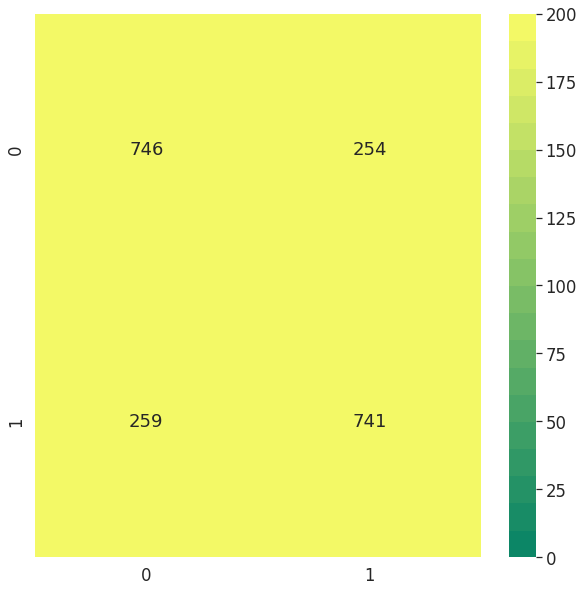

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title("low cos similality 2 classes")
plt.rcParams["font.size"] = 20
sns.heatmap(df, cmap= sns.color_palette('rainbow', 50), annot=True,fmt='.0f',vmin=0,vmax=1000)


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(label_df,pred_df))

metrics.confusion_matrix(label_df,pred_df)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.74      0.74      0.74      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



array([[746, 254],
       [259, 741]])

In [ ]:
from sklearn.metrics import classification_report

print("Classification report")
print(classification_report(label_df,pred_df))

Classification report
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.74      0.74      0.74      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



In [ ]:
import pprint
d = metrics.classification_report(label_df,pred_df, output_dict=True)
pprint.pprint(d)

{'0': {'f1-score': 0.744139650872818,
       'precision': 0.7422885572139304,
       'recall': 0.746,
       'support': 1000},
 '1': {'f1-score': 0.7428571428571429,
       'precision': 0.7447236180904523,
       'recall': 0.741,
       'support': 1000},
 'accuracy': 0.7435,
 'macro avg': {'f1-score': 0.7434983968649804,
               'precision': 0.7435060876521913,
               'recall': 0.7435,
               'support': 2000},
 'weighted avg': {'f1-score': 0.7434983968649803,
                  'precision': 0.7435060876521914,
                  'recall': 0.7435,
                  'support': 2000}}


In [ ]:
df = pd.DataFrame(d)
df

,0,1,accuracy,macro avg,weighted avg
precision,0.742289,0.744724,0.7435,0.743506,0.743506
recall,0.746000,0.741000,0.7435,0.743500,0.743500
f1-score,0.744140,0.742857,0.7435,0.743498,0.743498
support,1000.000000,1000.000000,0.7435,2000.000000,2000.000000
